# DGW eendaagse module


<img src="https://www.strafrechtketen.nl/binaries/medium/content/gallery/strafrechtketen/content-afbeeldingen/partners/jid_logo.jpg" width=400 height=200/>

DGW intro voor Data science

In deze cursus gaan we proeven aan het geen wat data science heet.

Het programma waar in je werkt heet een Jupyter notebook. De code is voor geprogrammeerd en kan je aanroepen door je cursor in de cel te zetten en op de uitvoeren knop (playknop) te klikken boven in het menu of toetscombinatie SHIFT+ENTER. Je hoeft dus niet direct zelf iets te programmeren. Gaat er iets fout? Refresh de browser en voer de cellen op chronologische volgorde uit.

## Een hele, hele kleine overview van een Jupyter Notebook


Python is een makkelijke taal om te leren. Python is begin jaren 90 ontworpen en ontwikkeld door de Nederlander Guido van Rossum, destijds verbonden aan het Centrum voor Wiskunde en Informatica in Amsterdam.

<img src="https://logodownload.org/wp-content/uploads/2019/10/python-logo-0.png" width=400 height=200/>

Om te oefenen gaan we onze eerste tekst printen, dat doen we door de ingebouwde print statement van Python. Daarna gaan we variabelen aanwijzen en aanpassen! Zet je cursor in de cel hier beneden en klik op de playknop. De output komt onder de cel.
#### opdracht 1 - print

In [1]:
print("Hello world")

Hello world



#### opdracht 2 - variabelen

In [2]:
a = 3
b = a + 2
print(b) #Wat is de uitkomst van b?

5


Python is flexibel we kunnen iedere keer een variabel overschrijven/aanpassen. Hieronder overschrijven we nogmaals variabel _a_ door de string _"Justid!"_.
#### opdracht 3 - data typen

In [3]:
a = "Justid!"
print("I Love " + a)

I Love Justid!


# Titanic dataset

In het volgende hoofstuk kijken we naar *beslissingsbomen*, ons type classificatiemodel dat dieper ingaat op het gebied van machine learning. In de oefening van vandaag gebruiken we de `scikit-learn` library.


***
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)
    
We illustreren hoe beslissingsbomen werken met behulp van de Titanic-survivaldataset die beschikbaar is op [Kaggle](https://www.kaggle.com/c/titanic/data). We zullen kijken naar een verscheidenheid aan variabelen om ons te helpen voorspellen of een bepaalde passagier op de Titanic kon overleven. Er is veel te vinden op internet (inclusief [hier](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)) over deze dataset, omdat het populair is onder degenen die net op de hoogte zijn van classificatiemodellen voor machine learning.
***



### Data legenda

|Variable|Definition|Key|
| --- | --- |:---|
| survival | Survival | 0 = No, 1 = Yes |
| pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex	| Sex | male female | 	
| Age | Age in years | 0.0 - 100.0 | 	
| sibsp	| # of siblings / spouses aboard the Titanic | 0-100	| 
| parch	| # of parents / children aboard the Titanic | 0-100 | 
| ticket | Ticket number | example: A/5 21171 | 
| fare	| Passenger fare | 0.000-100.0000	| 
| cabin	| Cabin number| example: C85	| 
| embarked | Port of Embarkation	| C = Cherbourg (France), Q = Queenstown (Ireland), S = Southampton (England) | 

## Inladen van de data
#### opdracht 14

_De volgende blok met code laadt de benodigde libraries in voor deze opdracht:_

In [4]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
warnings.filterwarnings("ignore")

#### opdracht 15

In [5]:
df = pd.read_csv('https://grantmlong.com/data/titanic.csv')

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploreren van de data
#### opdracht 15

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### opdracht 16

**Over de data:**

    Het aantal passagiers zijn 891 wat ongeveer 40% is van het daadwerkelijke nummer aan boord van de Titanic (2,224).
    We missen ongeveer 20% data in Age. We doen de aanname dat leeftijd waarschijnlijk belangrijk zijn
    We missen ongeveer 80% in de Cabin column en misschien droppen we deze column.
    Er zijn zijn 2 missende data in Embarked
    Ticket laten we misschien vallen aangezien we over 200 dubbele hebben en Ticket informatiie is waarschijnlijk niet hoog gecoralleerd aan survival
    Name niet meteen gerelated aan survival dus we kunnen het laten vallen.





**Aannames:**


Om nauwkeurig te kunnen voorspellen, moeten we kenmerken onderzoeken die correleren met Survival. Aangenomen wordt dat:

- SEX: Vrouwen (geslacht = vrouw) hebben meer kans om te overleven.
- SibSp/Parch: Mensen die alleen reizen, hebben meer kans om te overleven.
- Age: Jonge kinderen hebben meer kans om te overleven.
- Pclass: De passagiers uit de hogere klasse (Pclass=1) hebben meer kans om te overleven.


#### opdracht 17

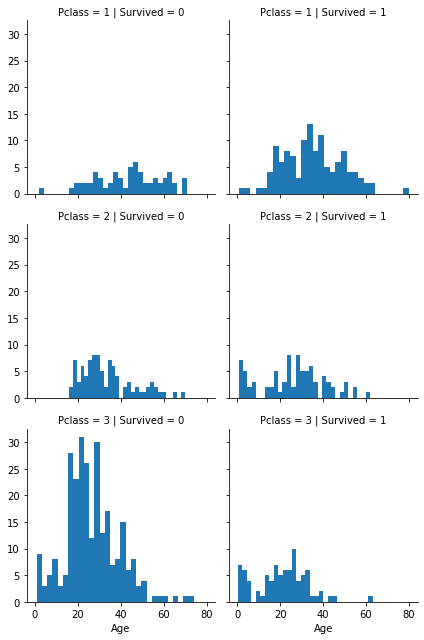

In [11]:
import seaborn as sns
g = sns.FacetGrid(df, col='Survived',row='Pclass')
g.map(plt.hist, 'Age', bins=30)
#linker rood maken en rechter groen

Percentage van Class 1 die hebben survived: 62.96296296296296
Percentage van Class 2 die hebben survived: 47.28260869565217
Percentage van Class 3 die hebben survived: 24.236252545824847


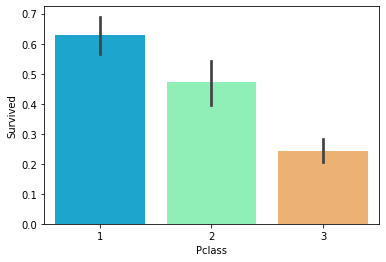

In [12]:
sns.barplot(x="Pclass", y="Survived",data=df,palette='rainbow')
#print percentages van klasses die overleven
print("Percentage van Class 1 die hebben survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage van Class 2 die hebben survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage van Class 3 die hebben survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

#### opdracht 18

Percentages vrouwen survived: 74.20382165605095
Percentages mannen survived: 18.890814558058924


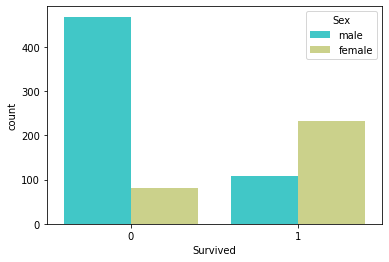

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')
#print percentages van vrouwen vs. mannen die overleven
print("Percentages vrouwen survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentages mannen survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)



#### opdracht 19

In [14]:
df[['SibSp','Survived']].groupby(by='SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


(SibSp=1) hebben de meeste kans om te overleven (53.6%)


In [15]:
df[['Parch','Survived']].groupby(by='Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000



(Parch=3) hebben de meeste kans om te overleven (60%)


**Reactie op eerdere veronderstellingen:**

- Sex: Vrouwen (geslacht = vrouw) hebben meer kans om te overleven.
    - Zeer goed mogelijk  


- SibSp/Parch: mensen die alleen reizen, hebben meer kans om te overleven
    - Niet echt. (SibSp=1) & (Parch=3) hebben de meeste kans om te overleven


- Age: Jonge kinderen hebben meer kans om te overleven.
    - Mogelijk. Jonge kinderen in klas 1 en 2 zijn zelden gesneuveld.


- Pclass: De passagiers uit de hogere klasse (Pclass=1) hebben meer kans om te overleven
    - Het aandeel overlevenden in klasse 1 & 2 is groter dan dat van klasse 3

Geslacht, Pclass, Age-kenmerken worden gecorreleerd aan overlevingen.


## Gegevens opschonen

    Ontbrekende waarde zou worden ingevuld door toerekening
    De kolommen Sex en Embarked worden omgezet in dummies-variabelen
    Ticket en cabine worden gedropt

### Leeftijdsfunctie

Ontbrekende waarden worden opgevuld door de mediaan van Leeftijd, gegroepeerd op verschillende klassen:
#### opdracht 20

In [16]:
# Kijken naar het gemiddelde Age groep per klasse
df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [17]:
# impute mediaan van Age gebasseerd op Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 25
        
    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

### Fare feature
1 missende waarde in Fare wordt opgevuld met het gemiddelde van de kolom Fare:
#### opdracht 21

In [19]:
# Vul na waarde Fare met de mediaan
df['Fare'].fillna(df['Fare'].median(),inplace=True)

### Sex en Embarked kenmerken
##### Laat Cabin, PassengerId, Ticket  kolom vallen
#### opdracht 22

In [20]:
# 2 missende waardes in Embarked en het is categorisch dus we laten het vallen
df.dropna(inplace=True)
df.drop(['Cabin','Ticket','PassengerId','Name'],axis=1,inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


### Transformeren
#### opdracht 23

In [22]:
# transform de categorische data in de dummies variabelen
train_sex = pd.get_dummies(df['Sex'],drop_first=True,dtype='int64')
train_embark = pd.get_dummies(df['Embarked'],drop_first=True,dtype='int64')


# delete de originele sex en embarked columns
df.drop(['Sex','Embarked'],axis=1,inplace=True)

# Update de dataframe
df = pd.concat([df,train_sex,train_embark],axis=1)


In [23]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  202 non-null    int64  
 1   Pclass    202 non-null    int64  
 2   Age       202 non-null    float64
 3   SibSp     202 non-null    int64  
 4   Parch     202 non-null    int64  
 5   Fare      202 non-null    float64
 6   male      202 non-null    int64  
 7   Q         202 non-null    int64  
 8   S         202 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.8 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1



### Bouwen van een model

We gaan drie modellen gebruiken (Decision Tree & Random Forest model) om te voorspellen.  
Eerst, splitten we de data in train en test set. De voorspellingen van de twee modellen zullen gevalueerd worden en de beste model zullen eruit pikken.

Een Decision Tree is eigenlijk een flowchart, en kan helpen beslissingen te nemen op basis van eerdere ervaringen/gegevens.
#### opdracht 23

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [45]:
dtree = DecisionTreeClassifier(random_state=101, max_depth=3)
dtree.fit(X_train,y_train)

pred_dtree = dtree.predict(X_test)

print(accuracy_score(y_test,pred_dtree))
print('\n')
print(classification_report(y_test,pred_dtree))
print('\n')



0.8292682926829268


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.74      0.85        27

    accuracy                           0.83        41
   macro avg       0.83      0.87      0.83        41
weighted avg       0.89      0.83      0.83        41





In [46]:
print(X)

     Pclass   Age  SibSp  Parch     Fare  male  Q  S
1         1  38.0      1      0  71.2833     0  0  0
3         1  35.0      1      0  53.1000     0  0  1
6         1  54.0      0      0  51.8625     1  0  1
10        3   4.0      1      1  16.7000     0  0  1
11        1  58.0      0      0  26.5500     0  0  1
..      ...   ...    ...    ...      ...   ... .. ..
871       1  47.0      1      1  52.5542     0  0  1
872       1  33.0      0      0   5.0000     1  0  1
879       1  56.0      0      1  83.1583     0  0  0
887       1  19.0      0      0  30.0000     0  0  1
889       1  26.0      0      0  30.0000     1  0  0

[202 rows x 8 columns]


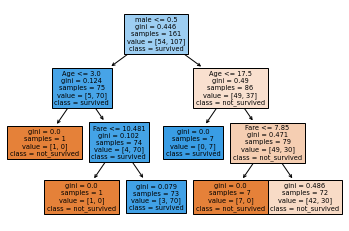

In [44]:
tree.plot_tree(dtree,
               feature_names = list(X.columns), 
               class_names=["not_survived","survived"],
               filled = True);

We behalen hier 83% accuracy.  
We kijken verder naar precision en recall. Dit houdt in dat we kijken naar of iemand terecht/onterecht is geclassificeerd.  
F1 is precision gedeeld door de recall.

## Zou ik de Titanic overleven?

Vul tussen de [ ] je eigen gevens in: 

- Pclass : welke klasse je had willen reizen
- Age : je leeftijd
- SibSP : aantal kinderen
- Parch : aantal ouder (als je die mee wilt nemen)
- Male: 1 voor ja , 0 voor nee
- Q : 1 voor vertrek van Queenstown, 0 niet
- S : 1 voor vertrek van Southhampton , 0 voor vertrek Cherbourg.

In [69]:
eigen_gegevens = {"Pclass":[3], "Age":[30], "SibSp":[0], "Parch":[0], "Fare":[10], "male":[1] ,"Q":[0], "S":[1]}

#### Krijg je hieronder 0? Dan zal je het niet overleven, 1 dan wel!!!

In [70]:
dtree.predict(pd.DataFrame.from_dict(eigen_gegevens)) 

array([0])